In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import verde as vd

In [2]:
icegrav = pd.read_csv('../data/icegrav.csv', header=0)
lcs1 = pd.read_csv('/home/jupyter-india/satellite/fieldvals', names=['bx', 'by', 'bz'], delim_whitespace=True)

In [4]:
grid_coordinates = vd.grid_coordinates([-84.4,-75.0,-35.2,27.6], spacing=0.05, extra_coords=3e3)

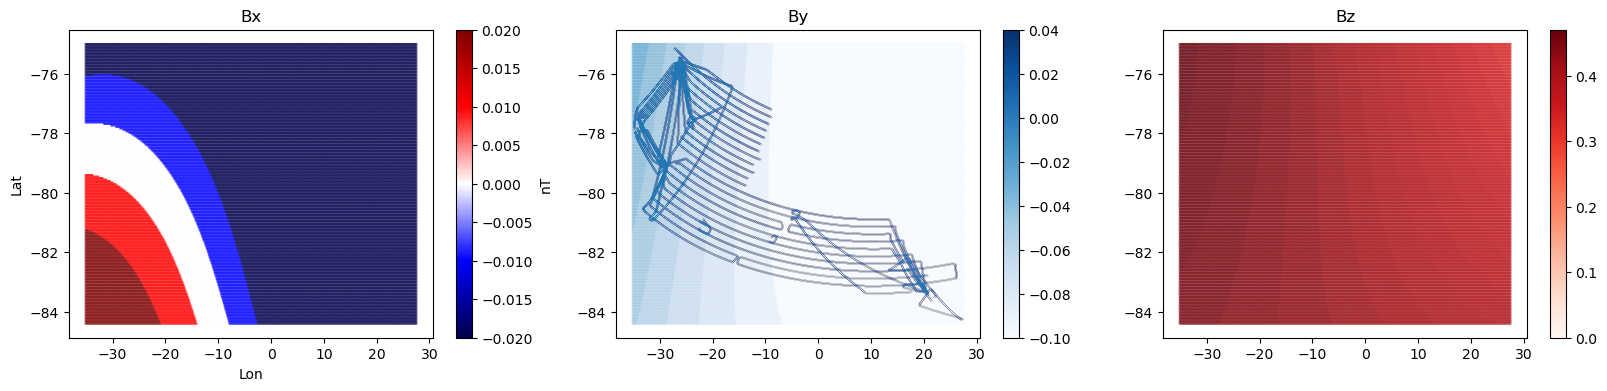

In [8]:
plt.figure(figsize=(20,4))
plt.subplot(1,3,1)
scale = np.nanpercentile(lcs1.bx, 99)
plt.scatter(grid_coordinates[1], grid_coordinates[0], c=lcs1.bx, cmap="seismic",s=0.01, vmin=-scale, vmax=scale)
plt.title("Bx")
plt.xlabel("Lon")
plt.ylabel("Lat")
plt.colorbar(label="nT")
plt.subplot(1,3,2)
# scale = vd.maxabs(lcs1.by)
scale = np.nanpercentile(lcs1.by, 99)
plt.scatter(grid_coordinates[1], grid_coordinates[0], c=lcs1.by, cmap="Blues",s=0.01, vmin=-scale, vmax=0)
plt.plot(icegrav.Lon, icegrav.Lat, '.', markersize=0.005)
plt.title("By")
plt.colorbar()
plt.subplot(1,3,3)
# scale = vd.maxabs(lcs1.bz)
scale = np.nanpercentile(lcs1.bz, 99)
plt.scatter(grid_coordinates[1], grid_coordinates[0], c=lcs1.bz, cmap="Reds",s=0.01, vmin=0, vmax=scale)
plt.title("Bz")
plt.colorbar()
plt.show()